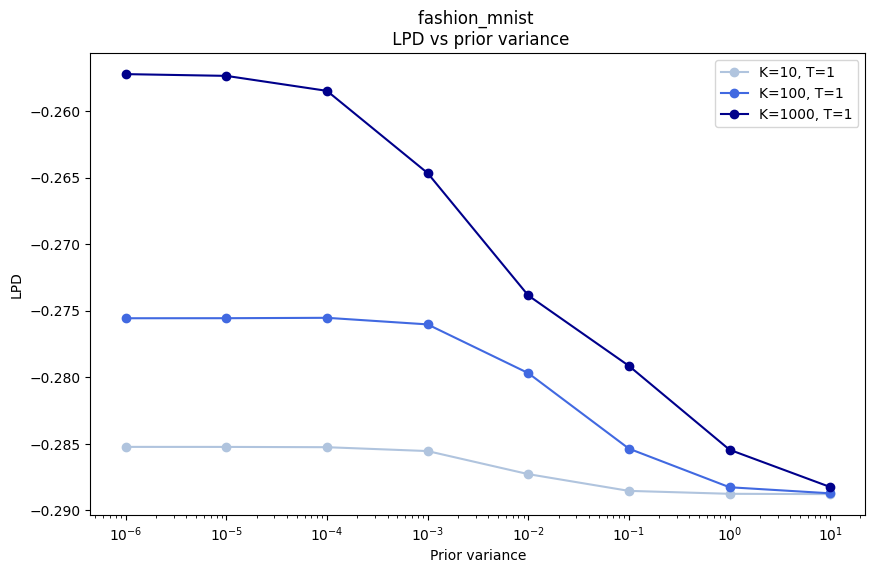

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import re

prior_sigmas = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
low_ranks = [1, 2, 5]
#dataset = "mnist"
dataset = "fashion_mnist"
type_plot = "prior_variance_T_vary"
type_plot = "prior_variance_T_1"
#type_plot = "lowrank"
K_list = [10, 100, 1000]
metric_to_plot = "LPD" #Accuracy, Entropy, LPD, ECE, MCE, OOD

#load data 
path = Path(f"{dataset}_SWA_{type_plot}.csv")
color_list = ["lightsteelblue", "royalblue", "darkblue"]

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for i, K in enumerate(K_list):
    df = pd.read_csv(path, index_col=0)
    df.index = df.index.str.replace(" ", "")
    idxs = [index for index, name in enumerate(df.columns) if f"K={K}," in name]
    T = re.search(r'T=(\d+)', df.columns[idxs[0]]).group(1)
    df = df.iloc[:, idxs]
    df = df.loc[metric_to_plot, :]

    if type_plot[:5] == "prior":
        ax.plot(prior_sigmas, df.values, marker='o', label=f"K={K}, T={T}", color=color_list[i])
        ax.set_xscale('log')
        ax.set_xlabel("Prior variance")
    elif type_plot[:7] == "lowrank":
        ax.plot(low_ranks, df.values, marker='o', label=f"K={K}, T={T}", color=color_list[i])
        ax.set_xlabel("rank")
    ax.set_ylabel(metric_to_plot)
    ax.legend()

    ax.set_title(f"{dataset} \n {metric_to_plot} vs prior variance")





In [92]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import re
import ipywidgets as widgets
from IPython.display import display


# Define the variables
prior_sigmas = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
low_ranks = [1, 2, 5]
dataset = "fashion_mnist"
K_list = [10, 100, 1000]
color_list = ["lightsteelblue", "royalblue", "darkblue"]

# Load the data
path = Path(f"{dataset}_SWA_prior_variance_T_1.csv")
df = pd.read_csv(path, index_col=0)
df.index = df.index.str.replace(" ", "")

# Widgets for type_plot and metric_to_plot
type_plot_widget = widgets.Dropdown(
    options=["prior_variance_T_1", "prior_variance_T_vary", "lowrank"],
    value="prior_variance_T_1",
    description="Type Plot:"
)

metric_to_plot_widget = widgets.Dropdown(
    options=["Accuracy", "Entropy", "LPD", "ECE", "MCE", "OOD"],
    value="Accuracy",
    description="Metric:"
)

# Function to update the plot interactively
def update_plot(type_plot, metric_to_plot):
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))

    for i, K in enumerate(K_list):
        # Get column indices for the current K
        idxs = [index for index, name in enumerate(df.columns) if f"K={K}," in name]
        # Extract value of T
        T = re.search(r'T=(\d+)', df.columns[idxs[0]]).group(1)
        df_K = df.iloc[:, idxs]
        df_metric = df_K.loc[metric_to_plot, :]

        # Plot based on type_plot
        if type_plot[:5] == "prior":
            ax.plot(prior_sigmas, df_metric.values, marker='o', label=f"K={K}, T={T}", color=color_list[i])
            ax.set_xscale('log')
            ax.set_xlabel("Prior variance")
        elif type_plot[:7] == "lowrank":
            ax.plot(low_ranks, df_metric.values, marker='o', label=f"K={K}, T={T}", color=color_list[i])
            ax.set_xlabel("rank")
        
        ax.set_ylabel(metric_to_plot)
        ax.legend()

    ax.set_title(f"{dataset} \n {metric_to_plot} vs prior variance")
    plt.show()

# Use ipywidgets to interactively update the plot
widgets.interactive(update_plot, type_plot=type_plot_widget, metric_to_plot=metric_to_plot_widget)

# Display dropdown menus
display(type_plot_widget, metric_to_plot_widget)

Dropdown(description='Type Plot:', options=('prior_variance_T_1', 'prior_variance_T_vary', 'lowrank'), value='…

Dropdown(description='Metric:', options=('Accuracy', 'Entropy', 'LPD', 'ECE', 'MCE', 'OOD'), value='Accuracy')